In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -Uq fastkaggle

In [3]:
import fastkaggle

In [4]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle
    
from fastkaggle import *
!pip install fastai --upgrade
from fastai.vision.core import *
from fastai.vision.data import *

In [5]:
from fastai.vision.all import *
path=untar_data(URLs.IMAGENETTE)

In [6]:
db=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
             get_items=get_image_files,
             get_y=parent_label,
             item_tfms=Resize(460),
             batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls=db.dataloaders(path,bs=64)

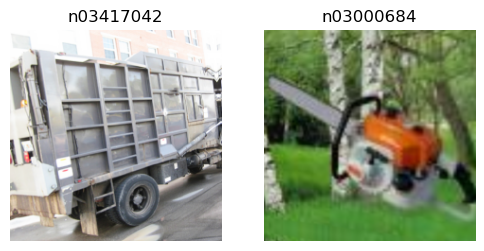

In [7]:
dls.show_batch(max_n=2)


In [8]:
dls.c??

Type:        int
String form: 10
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4

In [9]:
model=xresnet50(n_out=dls.c)
learn=Learner(dls,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.603991,2.798823,0.368559,02:51
1,1.232989,1.285794,0.589246,02:49
2,0.959436,2.358888,0.506721,02:50
3,0.738106,0.690428,0.781180,02:49
4,0.620015,0.555500,0.824869,02:48


In [12]:
x,y=dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([0.4571, 0.4685, 0.4421], device='cuda:0'),
 TensorImage([0.2747, 0.2701, 0.2982], device='cuda:0'))

In [22]:
def get_dls(bs,size):
    dblock=DataBlock(blocks=(ImageBlock(),CategoryBlock()) ,
                     get_items=get_image_files,
                    get_y=parent_label,
                    item_tfms=Resize(460),
                    batch_tfms=[*aug_transforms(size=size,min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path,bs=bs)
    

In [23]:
dls=get_dls(64,224)

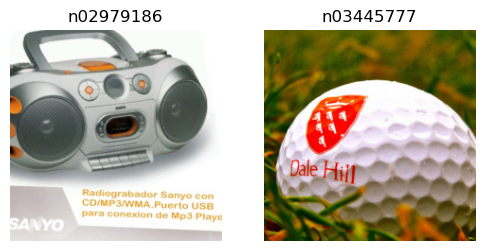

In [25]:
dls.show_batch(max_n=2)

In [26]:
x,y=dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])

(TensorImage([-0.2259, -0.0404,  0.0281], device='cuda:0'),
 TensorImage([1.1881, 1.2031, 1.3542], device='cuda:0'))

In [27]:
model=xresnet50(n_out=dls.c)
learn=Learner(dls,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.626744,2.221616,0.355863,03:17
1,1.270747,1.691215,0.480583,03:17
2,0.957234,0.894682,0.712845,03:17
3,0.743104,0.737046,0.761389,03:18
4,0.590854,0.576114,0.817774,03:16


In [30]:
dls=get_dls(128,128)


In [31]:
learn = Learner(dls, xresnet50(n_out=dls.c), loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.590715,2.194585,0.437267,02:55
1,1.275974,1.053857,0.679985,02:54
2,0.980873,0.859889,0.723301,03:00
3,0.746862,0.645089,0.793503,02:58


In [32]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.846444,0.817381,0.746826,03:18


epoch,train_loss,valid_loss,accuracy,time
0,0.660556,0.710772,0.778939,03:19
1,0.643085,0.580461,0.828603,03:20
2,0.581957,0.578825,0.825616,03:20
3,0.486294,0.455301,0.856609,03:25
4,0.428474,0.426436,0.864451,03:38


In [33]:

preds,targs = learn.tta()
accuracy(preds, targs).item()

0.8666915893554688

<Axes: >

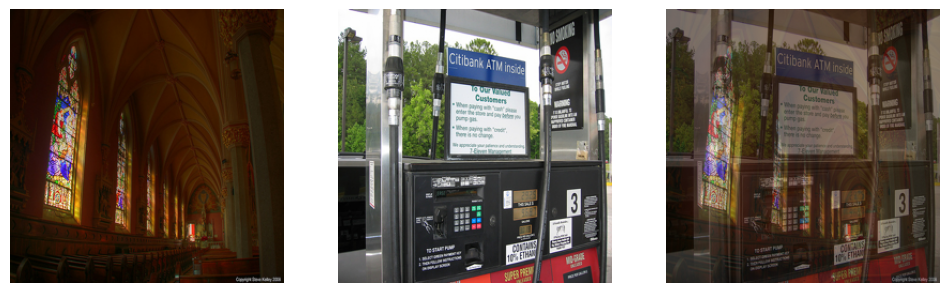

In [47]:
church =PILImage.create(get_image_files(path/'train'/'n03028079')[0])
               
gas=PILImage.create(get_image_files(path/'train'/'n03425413')[0])
church=church.resize((256,256))
gas=gas.resize((256,256))
tchurch=tensor(church).float()/255.
tgas=tensor(gas).float()/255.

_,axs=plt.subplots(1,3,figsize=(12,4))

show_image(tchurch,ax=axs[0]);
show_image(tgas,ax=axs[1]);
show_image((0.6*tchurch+0.4*tgas),ax=axs[2])
#

In [48]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy, cbs=MixUp())
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.906699,2.895917,0.330471,03:05
1,1.688293,1.566921,0.499253,03:03
2,1.483548,1.069414,0.671023,03:10
3,1.302062,0.793804,0.765497,03:10
4,1.180224,0.676516,0.797984,02:20


In [49]:
learn
